In [16]:
from sklift import datasets, models, viz, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import lightgbm as lgb

In [26]:
features, y, t = datasets.fetch_lenta(data_home="../../../data", return_X_y_t=True)
t = np.where(t == 'control', 0, 1)

In [27]:
features = features[features.columns.difference(["gender"])]

In [33]:
X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(features, y, t, train_size=0.8, stratify=t)

In [34]:
model = models.ClassTransformation(
    lgb.LGBMClassifier(),
#     lgb.LGBMClassifier()
)

model.fit(X_train, y_train, t_train)

/home/isabella/code/study/diploma/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.
  


ClassTransformation(estimator=LGBMClassifier())

In [35]:
prediction = model.predict(X_test)

array([<AxesSubplot:title={'center':'Uplift by percentile\nweighted average uplift = 0.0059'}>,
       <AxesSubplot:title={'center':'Response rate by percentile'}, xlabel='Percentile'>],
      dtype=object)

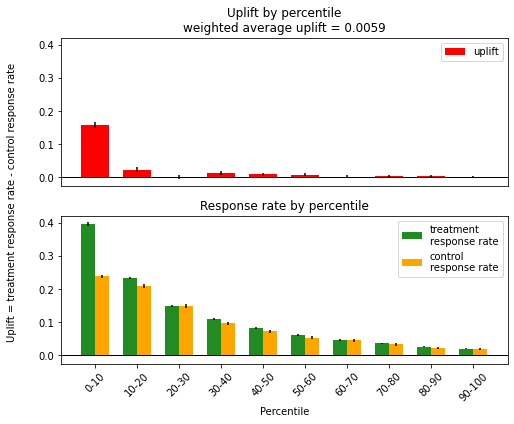

In [36]:
viz.plot_uplift_by_percentile(y_test, prediction, t_test, kind='bar')

<AxesSubplot:title={'center':'Uplift curve\nuplift_auc_score=0.0432'}, xlabel='Number targeted', ylabel='Gain: treatment - control'>

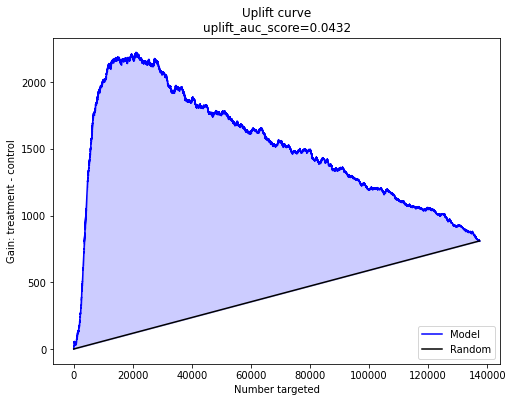

In [37]:
viz.plot_uplift_curve(y_test, prediction, t_test, perfect=False)

In [41]:
metrics.uplift_at_k(y_test, prediction, t_test, "by_group", k=0.3)

0.02541120973451197